<a href="https://colab.research.google.com/github/Tharunkumar1724/ML-Internship/blob/main/Credit_card_fraud1_using_Suport_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
np.__version__


'1.26.4'

** Isolation Forest is an unsupervised anomaly detection algorithm that is particularly effective for identifying outliers in high-dimensional datasets. It works on the principle that anomalies are easier to isolate compared to normal data points.**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
path="/content/gdrive/My Drive/ Dataset/creditcard.csv"

Mounted at /content/gdrive


In [6]:
mat=pd.read_csv(path)
df=pd.DataFrame(mat)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Exploratory** **data** **analysis**

In [9]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df['Class'].unique()

array([0, 1])

In [11]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


**Here 0 states OG transaction and 1 states** **fraud** **transaction**

<ipython-input-12-615b9b72070c>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cnt=pd.value_counts(df['Class'],sort=True)


Text(0, 0.5, 'Frequency')

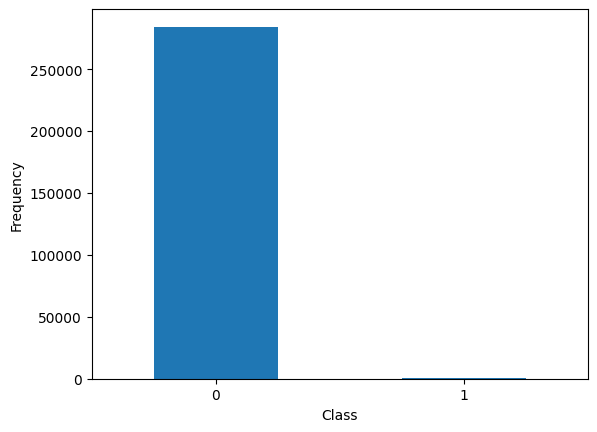

In [12]:
cnt=pd.value_counts(df['Class'],sort=True)
import matplotlib.pyplot as plt
cnt.plot(kind='bar',rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")

**The 1 class is defined as fraud class in the credit card detection**

In [13]:
OG=df[df['Class']==0]
fraud=df[df['Class']==1]
fraud.shape

(492, 31)

In [14]:
fraud.shape

(492, 31)

In [15]:
OG['Amount'].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [16]:
fraud['Amount'].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


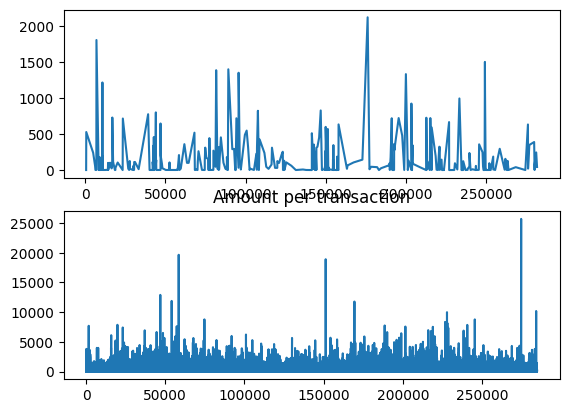

In [17]:

f,(ax1,ax2)=plt.subplots(2,1)
plt.title("Amount per transaction")
ax1.plot(fraud['Amount'])
ax2.plot(OG['Amount'])
plt.show()


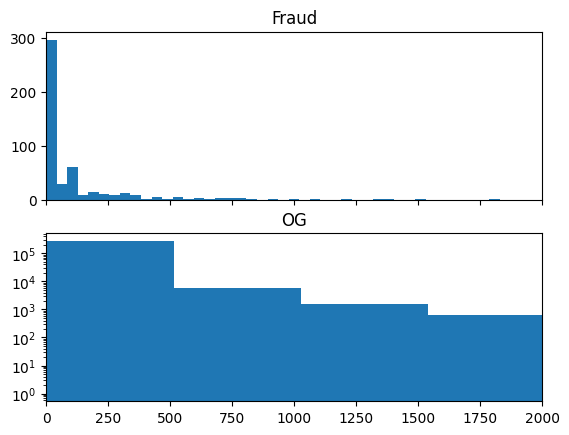

In [18]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
plt.title("Amount per transaction")
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(OG.Amount,bins=bins)
ax2.set_title('OG')
plt.xlim((0,2000))
plt.yscale('log')

plt.show()


In [19]:
df1=df.sample(frac=0.1,random_state=1)

In [20]:
df1.shape

(28481, 31)

In [21]:
fraud1=df1[df1['Class']==1]
OG1=df1[df1['Class']==0]
out_lier=len(fraud1)/float(len(OG1))
out_lier

0.0017234102419808666

In [22]:
format(len(OG1))


'28432'

In [23]:
format(len(fraud1))

'49'

<Axes: >

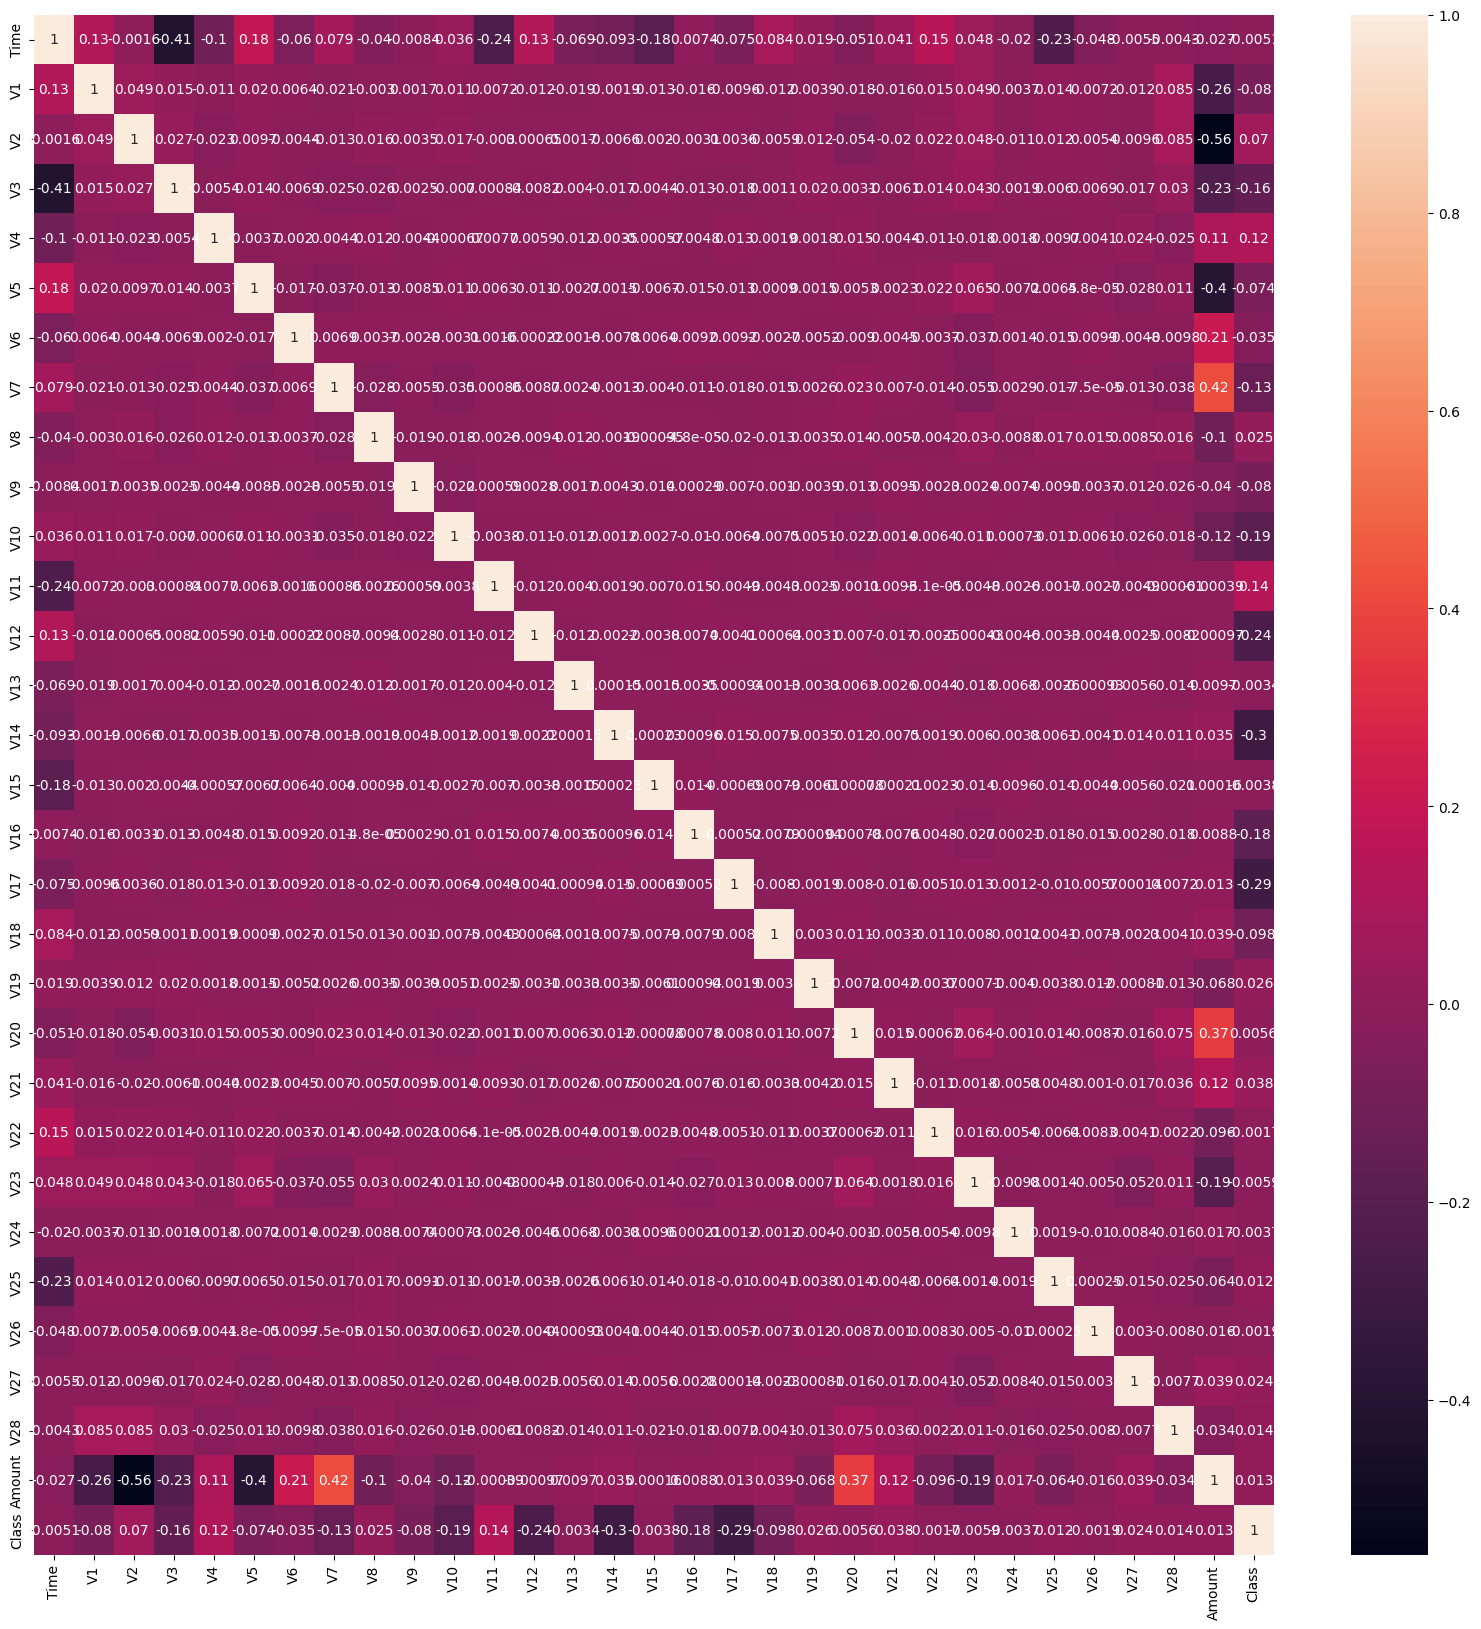

In [24]:
import seaborn as sns
cori=df1.corr()
corri_feature=cori.index
corri_feature
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

In [25]:
 x=df1.drop('Class',axis=1)
 y=df1['Class']

In [26]:

y.shape

(28481,)

**Using Isolation Forest**

```



In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(x)

IsolationForest(contamination=0.1, random_state=42)

In [28]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score

In [29]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(x)

IsolationForest(contamination=0.1, random_state=42)

In [30]:
y_pred = iso_forest.predict(x)

In [31]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [32]:
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28432
           1       0.01      0.82      0.03        49

    accuracy                           0.90     28481
   macro avg       0.51      0.86      0.49     28481
weighted avg       1.00      0.90      0.95     28481

Accuracy: 0.9010919560408693


**Using Support Vector Machine**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
x=df1.drop('Class',axis=1)
y=df1['Class']

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)
svm_classifier=SVC(kernel='linear',C=1.0,gamma='scale')
svm_classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [41]:
y_pred=svm_classifier.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Accuracy:", accuracy_score(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.50      0.57      0.53         7

    accuracy                           1.00      5697
   macro avg       0.75      0.79      0.77      5697
weighted avg       1.00      1.00      1.00      5697

Accuracy: 0.9987712831314727



**he Support Vector Machine was Over fitting in Order to acheive my Prediction model acurately i used resampling**



In [43]:
from sklearn.utils import resample
fraud1=df1[df1['Class']==1]
OG1=df1[df1['Class']==0]


In [46]:
print(OG1.shape)
print(fraud1.shape)


(28432, 31)
(49, 31)


In [49]:
df_minority_upsampled=resample(fraud1,replace=True,n_samples=7000,random_state=123)
df_minority_upsampled.shape
df_upsampled=pd.concat([OG1,df_minority_upsampled])
df_upsampled.shape

(35432, 31)

In [50]:
x=df_upsampled.drop('Class',axis=1)
y=df_upsampled['Class']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scale=StandardScaler()

In [52]:
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)
svm_classifier=SVC(kernel='linear',C=1.0,gamma='scale')
svm_classifier.fit(X_train,Y_train)


SVC(kernel='linear')

In [55]:
y_pred=svm_classifier.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Accuracy:", accuracy_score(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5687
           1       0.95      0.92      0.94      1400

    accuracy                           0.98      7087
   macro avg       0.97      0.96      0.96      7087
weighted avg       0.98      0.98      0.98      7087

Accuracy: 0.9762946239593622
